# House Prices - Advanced Regression Techniques
Kaggle dataset : [https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data]

### Sobre os dados:
**File descriptions:**
* **train.csv** - the training set
* **test.csv** - the test set
* **data_description.txt** - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here\
* **sample_submission.csv** - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression as LR
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error  as MSE

data=pd.read_csv('train.csv')
#data = data.drop('Id', axis=1)

In [2]:
# 1 - Separando colunas numéricas
df=data.select_dtypes(include=['number']) #1460x38(novo dataframe)
#df.isnull().sum().sort_values(ascending=False)

# 2 - Eliminar coluna que tem mais que 10% dos dados nulos.
col_10null = df.columns[(df.isnull().sum()/df.shape[0]) > 0.1]
df = df.drop(col_10null,axis=1)

In [3]:
# 3 - Examples |Options
#ex1) Remove rows with null data.
df0=df.dropna()

#ex2) To replace Null values with the median Values 
df1=df
null_coll = df1.columns[df1.isnull().any()].tolist()
for i in null_coll:
   df1[i]=df1[i].fillna(df1[i].median())

#ex3) To replace by random sample
df2=df
np.random.seed(42)  
null_coll = df2.columns[df2.isnull().any()].tolist()
for i in null_coll:
    N=df2[i].isnull().sum()
    sample = np.random.choice(df2[i].dropna(), size=N, replace=False)
    df2.loc[df2[i].isnull(), 'GarageYrBlt'] = sample
    

### Base de treino e teste

### Modelos
1. Regressão linear
2. Árvore de Regressão
3. KNeighborsRegressor

In [4]:
# Base de treino e teste
from sklearn.model_selection import train_test_split

x = df2.drop('SalePrice',axis=1)
y = df2.SalePrice

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#1 Regressão Linear
mod_LR = LR().fit(x_train, y_train)
y_lr = mod_LR.predict(x_test)

# Arvore de regressão
mod_tree = tree.DecisionTreeRegressor(random_state=42).fit(x_train, y_train)
y_tree   =mod_tree.predict(x_test)

#K-vizinhos mais próximos
mod_knn = KNN(n_neighbors=2).fit(x_train, y_train)
y_knn   = mod_knn.predict(x_test)

### Avaliando Erro dos modelos

In [5]:
print('===== Sumary Tests ====')
print('\nLinear Regression Model')
print(f'MAE: {MAE(y_test,y_lr):3f}')
print(f'MSE: {MSE(y_test,y_lr):3f}')
print(f"Score(R²): {mod_LR.score(x_test, y_test):.3f}")

print('\nDecision Tree Regression Model')
print(f'MAE: {MAE(y_test,y_tree):3f}')
print(f'MSE: {MSE(y_test,y_tree):3f}')
print(f"Score(R²): {mod_tree.score(x_test, y_test):.3f}")

print('\nk-nearest neighbors Model')
print(f'MAE: {MAE(y_test,y_knn):3f}')
print(f'MSE: {MSE(y_test,y_knn):3f}')
print(f"Score(R²): {mod_knn.score(x_test, y_test):.3f}")

===== Sumary Tests ====

Linear Regression Model
MAE: 23899.102077
MSE: 1565904387.532156
Score(R²): 0.787

Decision Tree Regression Model
MAE: 27436.209544
MSE: 2157243065.470954
Score(R²): 0.706

k-nearest neighbors Model
MAE: 32832.423237
MSE: 2697627184.795643
Score(R²): 0.633


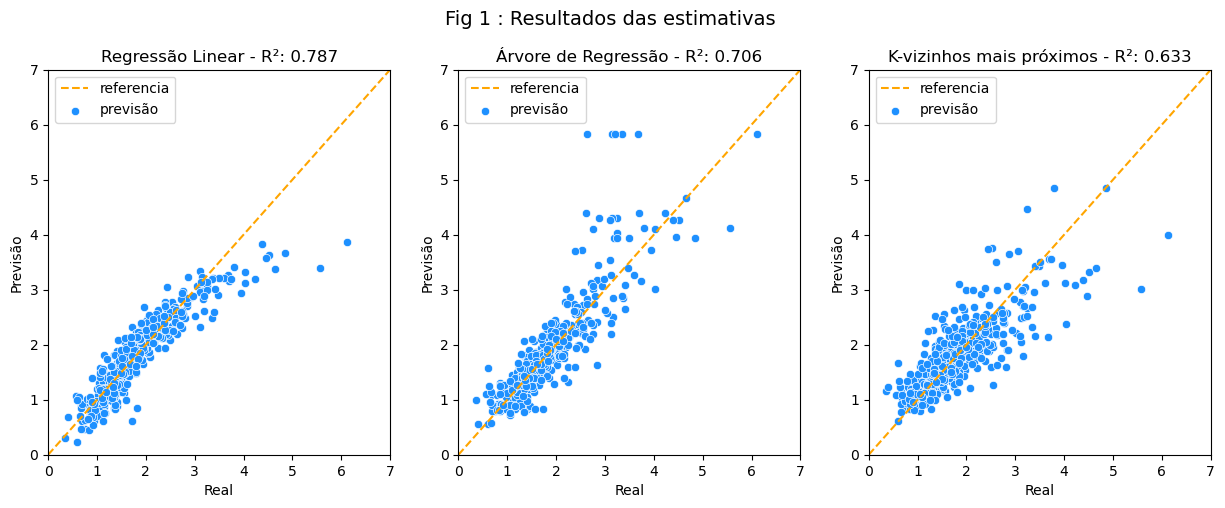

In [6]:
# Plotagem

fig, ax = plt.subplots(ncols=3,figsize=(15,5))
fig.suptitle('Fig 1 : Resultados das estimativas', fontsize=14,y=1);

D=100000

sns.scatterplot(x=y_test/D, y=y_lr/D, ax=ax[0], color='dodgerblue',label='previsão')
ax[0].plot([0,70],[0,70],'--',color='orange',label='referencia')
ax[0].set(xlim=(0, 7),ylim=(0, 7))
ax[0].set_title(f"Regressão Linear - R²: {mod_LR.score(x_test, y_test):.3f}")
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[0].legend()

sns.scatterplot(x=y_test/D, y=y_tree/D, ax=ax[1], color='dodgerblue',label='previsão')
ax[1].plot([0,70],[0,70],'--',color='orange',label='referencia')

ax[1].set(xlim=(0, 7),ylim=(0, 7))
ax[1].set_title(f'Árvore de Regressão - R²: {mod_tree.score(x_test, y_test):.3f}')
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[1].legend()

sns.scatterplot(x=y_test/D, y=y_knn/D, ax=ax[2], color='dodgerblue',label='previsão')
ax[2].plot([0,70],[0,70],'--',color='orange',label='referencia')
ax[2].set(xlim=(0, 7),ylim=(0, 7))
ax[2].set_title(f'K-vizinhos mais próximos - R²: {mod_knn.score(x_test, y_test):.3f}')
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')
ax[2].legend()

plt.show()


## Previsão para base de teste para Kaggle


In [9]:
#to media data
df_test=pd.read_csv('test.csv');
print("Colunas com valores nulos:", df_test.shape)

#1) separar variaves numéricas
df_test=df_test.select_dtypes(include=['number']) 
# 2) Remove column that has more than 10% of null data.
col_10null = df_test.columns[(df_test.isnull().sum()/df_test.shape[0]) > 0.1]
df_test = df_test.drop(col_10null,axis=1)

# 3) Replace for median in null data
null_coll = df_test.columns[df_test.isnull().any()].tolist()
for i in null_coll:
   df_test[i]=df_test[i].fillna(df_test[i].median())
print("Colunas com valores nulos:", null_coll)

# 4) Run Linear Model
y_lr = mod_LR.predict(df_test)

# 5) save result
df_test['SalePrice'] = y_lr

s = df_test[['Id','SalePrice']]
s.to_csv('solution_011.csv',index=False)
print("Colunas com valores nulos:", s.shape)

Colunas com valores nulos: (1459, 80)
Colunas com valores nulos: ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
Colunas com valores nulos: (1459, 2)


In [8]:
#To Sample data
df_test=pd.read_csv('test.csv');
print("Colunas com valores nulos:", df_test.shape)

#1) separar variaves numéricas
df_test=df_test.select_dtypes(include=['number']) 
# 2) Remove column that has more than 10% of null data.
col_10null = df_test.columns[(df_test.isnull().sum()/df_test.shape[0]) > 0.1]
df_test = df_test.drop(col_10null,axis=1)

# 3) Replace sample
np.random.seed(42)  
null_coll = df_test.columns[df_test.isnull().any()].tolist()
for i in null_coll:
    N=df_test[i].isnull().sum()
    sample = np.random.choice(df_test[i].dropna(), size=N, replace=False)
    df_test.loc[df_test[i].isnull(), 'GarageYrBlt'] = sample

# 4) Run Linear Model
y_lr = mod_LR.predict(df_test)

# 5) save result
df_test['SalePrice'] = y_lr

s = df_test[['Id','SalePrice']]
s.to_csv('solution_02.csv',index=False)
print("Colunas com valores nulos:", s.shape)

Colunas com valores nulos: (1459, 80)
Colunas com valores nulos: (1459, 2)
